In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error,root_mean_squared_error,mean_absolute_error
from sklearn.svm import SVR

In [2]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


In [3]:
df.drop(['Payer Name','CC Number','Payment ID'],axis=1,inplace=True)

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15


In [5]:
df['tip_per_person'] = df['tip'] / df['size']

In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,tip_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,0.505000
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,0.553333
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,1.166667
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,1.655000
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,0.902500


In [7]:
df.drop(['tip','total_bill','size'],axis=1,inplace=True)

In [8]:
df.head()

,sex,smoker,day,time,price_per_person,tip_per_person
0,Female,No,Sun,Dinner,8.49,0.505000
1,Male,No,Sun,Dinner,3.45,0.553333
2,Male,No,Sun,Dinner,7.00,1.166667
3,Male,No,Sun,Dinner,11.84,1.655000
4,Female,No,Sun,Dinner,6.15,0.902500


In [90]:
df.describe()

,sex,smoker,time,price_per_person,tip_per_person,day_Fri,day_Sat,day_Sun,day_Thur
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,0.643443,0.381148,0.278689,7.888197,1.212762,0.077869,0.356557,0.311475,0.254098
std,0.479967,0.486667,0.449276,2.914234,0.491705,0.268516,0.479967,0.464049,0.436248
min,0.000000,0.000000,0.000000,2.880000,0.400000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,5.800000,0.862500,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,7.255000,1.107500,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,9.390000,1.500000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,20.270000,3.333333,1.000000,1.000000,1.000000,1.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex               244 non-null    int64  
 1   smoker            244 non-null    int64  
 2   time              244 non-null    int64  
 3   price_per_person  244 non-null    float64
 4   tip_per_person    244 non-null    float64
 5   day_Fri           244 non-null    float64
 6   day_Sat           244 non-null    float64
 7   day_Sun           244 non-null    float64
 8   day_Thur          244 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 17.3 KB


In [15]:
print(df['sex'].value_counts()),
print(df['smoker'].value_counts()),
print(df['day'].value_counts()),
print(df['time'].value_counts())


sex
Male      157
Female     87
Name: count, dtype: int64
smoker
No     151
Yes     93
Name: count, dtype: int64
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
time
Dinner    176
Lunch      68
Name: count, dtype: int64


In [17]:
from sklearn.preprocessing import LabelEncoder
l1 = LabelEncoder()
l2 = LabelEncoder()
l3 = LabelEncoder()

In [18]:
df['sex'] = l1.fit_transform(df['sex'])
df['smoker'] = l1.fit_transform(df['smoker'])
df['time'] = l1.fit_transform(df['time'])

In [20]:
onehotencoder = OneHotEncoder()
df_day = onehotencoder.fit_transform(df[['day']]).toarray()

In [21]:
df_day

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],


In [22]:
df1_day = pd.DataFrame(df_day,columns = onehotencoder.get_feature_names_out(['day']))
df1_day.head()

,day_Fri,day_Sat,day_Sun,day_Thur
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


In [23]:
df = pd.concat([df.drop(['day'],axis=1),df1_day],axis=1)
df.head()

,sex,smoker,time,price_per_person,tip_per_person,day_Fri,day_Sat,day_Sun,day_Thur
0,0,0,0,8.49,0.505000,0.0,0.0,1.0,0.0
1,1,0,0,3.45,0.553333,0.0,0.0,1.0,0.0
2,1,0,0,7.00,1.166667,0.0,0.0,1.0,0.0
3,1,0,0,11.84,1.655000,0.0,0.0,1.0,0.0
4,0,0,0,6.15,0.902500,0.0,0.0,1.0,0.0


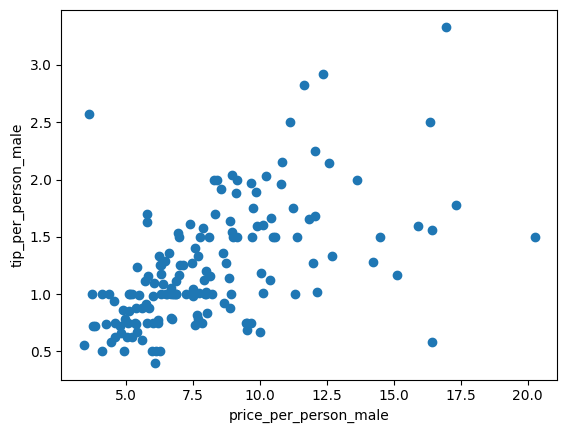

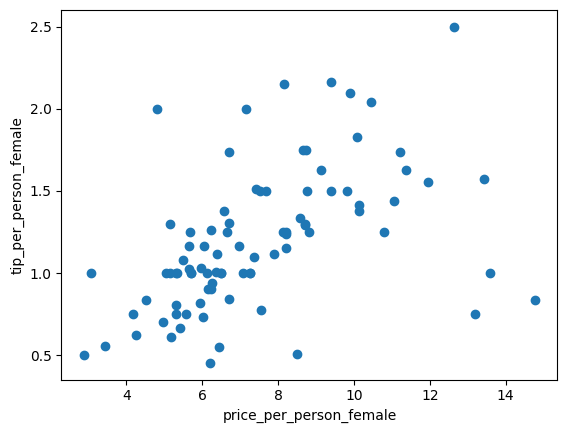

In [28]:
df_male = df[df['sex'] == 1]
df_female = df[df['sex'] == 0]
plt.scatter(df_male['price_per_person'],df_male['tip_per_person'])
plt.xlabel('price_per_person_male')
plt.ylabel('tip_per_person_male')
plt.show()
plt.scatter(df_female['price_per_person'],df_female['tip_per_person'])
plt.xlabel('price_per_person_female')
plt.ylabel('tip_per_person_female')
plt.show()



Can use Boxplot also

In [29]:
X = df.drop('tip_per_person',axis=1)
y = df['tip_per_person']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [64]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=50, shuffle=True, random_state=42)

In [65]:
model = SVR()
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [2,3,4,5]
c_value = [1,0.1,10,5,0.5,100,50]
gamma = ['scale', 'auto'],

In [69]:
params = [
    {
        'kernel': ['rbf', 'poly', 'sigmoid'],
        'C': [0.1, 1, 10],
        'degree': [2, 3]  # Only for 'poly'
    },
]

In [70]:
gridsearchcv = GridSearchCV(estimator=model,param_grid=params,cv=cv,scoring='neg_mean_absolute_error')

In [71]:
gridsearchcv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=50, random_state=42, shuffle=True),
             estimator=SVR(),
             param_grid=[{'C': [0.1, 1, 10], 'degree': [2, 3],
                          'kernel': ['rbf', 'poly', 'sigmoid']}],
             scoring='neg_mean_absolute_error')

In [74]:
gridsearchcv.best_params_

{'C': 0.1, 'degree': 2, 'kernel': 'rbf'}

In [81]:
finalmodel = SVR(C=0.1,degree=2,kernel='rbf')

In [96]:
finalmodel.fit(X_train,y_train)

SVR(C=0.1, degree=2)

In [98]:
y_pred = finalmodel.predict(X_test)

In [99]:
y_pred.shape

(49,)

In [100]:
mse = mean_squared_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f"mse is {mse}")
print(f"rmse is {rmse}")
print(f"mae is {mae}")

mse is 0.13009294133863955
rmse is 0.36068399096527637
mae is 0.27431612126798016


Since Standard deviation is 0.49 and mae value is 0.27 this model is accepted

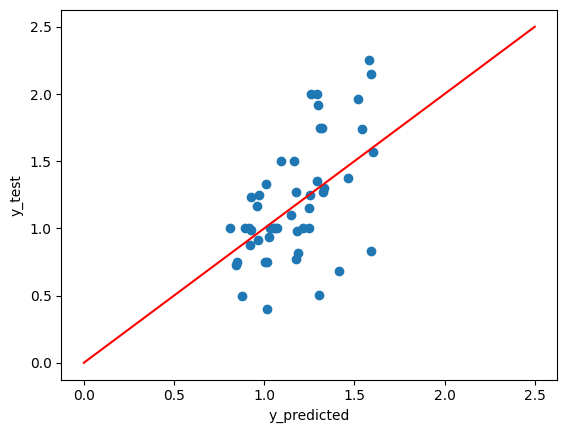

In [101]:
x = np.linspace(0, 2.5, 100)
y = x
plt.scatter(y_pred,y_test)
plt.plot(x,y,'r-')
plt.xlabel('y_predicted')
plt.ylabel('y_test')
plt.show()
